In [22]:
import simpy
import numpy as np
import scipy.stats as st
import pandas as pd

from simulation import Person

## Preguntas
- Cual es la media de la cantidad de tareas resultas siguiendo cada estrategia?

- Comparar que estrategia de administración de tiempo es mas productiva?
  - 24-6
  - 12-3
  - Free

- ¿Cuál es la distribución de la cantidad de tareas completadas en la ventana de tiempo de 480 minutos? Esto te permitiría entender cuánto varía el rendimiento de la persona.

- ¿Cómo afecta la duración de los descansos a la cantidad de tareas completadas? Podrías comparar las simulaciones con diferentes duraciones de descanso para ver si hay alguna diferencia significativa.

- ¿Cómo afectan las interrupciones a la cantidad de tareas completadas? Similar a la pregunta anterior, podrías comparar las simulaciones con y sin interrupciones.

- ¿Cuál es la distribución del tiempo entre tareas completadas? Esto te permitiría entender cómo se distribuye el tiempo de trabajo de la persona.

- ¿Cómo se correlacionan el número de descansos y el número de tareas completadas? Esto podría ayudarte a entender si tomar más descansos lleva a completar más tareas.

In [24]:
import copy

def simulate(n, time, b_time=0, b_duration=0, interruptions=True, verbose=False, likelihood=False, MSE=[5,5,10,10,30,30,30,30]):
    df = pd.DataFrame({})

    i=0
    invalid = likelihood
    while invalid or i < n:
        env = simpy.Environment()
        person = Person(env,'S', b_time, b_duration,interr= interruptions)
        env.run(until=time)
        env.event().succeed()
        env.event().succeed()
        env.event().succeed()
        # Data Collecting
        row = pd.DataFrame(
            {  
                "break_duration": [b_duration], 
                "break_timestamp": [b_time],
                "interruptions": [copy.copy(person.interrupts)],
                "completed_tasks": [copy.copy(person.completed_tasks)],
                "breaks": [copy.copy(person.breaks)],
                "working_time": [copy.copy(person.task_duration_sum)],
                "break_time": [copy.copy(person.break_duration_sum)],
                "interruption_time": [copy.copy(person.interruption_duration_sum)],
            }
        )
        df = pd.concat([df,row])

        # To verify stopping criteria
        if likelihood:
            est_std = df.std()
            # print(len(est_std[est_std/np.sqrt(i+1) < MSE]))
            invalid = len(est_std[est_std/np.sqrt(i+1) < MSE]) < 8
        

        # If the simulation verbosity is true the print the outcomes
        if verbose:
            print("Descanso: ",person.breaks)
            print("Tareas Completadas: ",person.completed_tasks)
            print("Duración Media de tareas: ",person.task_duration_sum/person.completed_tasks)
            print("Interrupciónes: ",person.interrupts)

        i+=1
        
        
    return df



## Extracting Data


In [25]:


df_rand_i = simulate(30, 480,likelihood=True)
df_24_6_i = simulate(30, 480, 24, 6, likelihood=True)
df_12_3_i = simulate(30, 480, 12, 3, likelihood=True)

df_rand_ni = simulate(30, 480, interruptions=False, likelihood=True)
df_24_6_ni = simulate(30, 480, 24, 6, interruptions=False, likelihood=True)
df_12_3_ni = simulate(30, 480, 12, 6, interruptions=False, likelihood=True)

df_i  = pd.concat([df_rand_i, df_24_6_i, df_12_3_i])
df_ni = pd.concat([df_rand_ni, df_24_6_ni, df_12_3_ni])

df = pd.concat([df_i, df_ni])

Exception ignored in: <generator object Person.working at 0x16c1ee110>
Traceback (most recent call last):
  File "/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/pandas/core/indexing.py", line 1723, in _getitem_axis
    elif isinstance(key, ABCDataFrame):
RuntimeError: generator ignored GeneratorExit
Exception ignored in: <generator object Person.working at 0x281d0f3e0>
Traceback (most recent call last):
  File "/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/pandas/core/indexing.py", line 1723, in _getitem_axis
    elif isinstance(key, ABCDataFrame):
RuntimeError: generator ignored GeneratorExit
Exception ignored in: <generator object Person.working at 0x281d0fca0>
Traceback (most recent call last):
  File "/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/pandas/core/flags.py", line 53, in __init__
    self._obj = weakref.ref(obj)
RuntimeError: generator ignored GeneratorExit
Exception ignor

Exception ignored in: <generator object Person.working at 0x281d795b0>
Traceback (most recent call last):
  File "/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/matplotlib/cbook.py", line 1782, in normalize_kwargs
    to_canonical = {alias: canonical
RuntimeError: generator ignored GeneratorExit
Exception ignored in: <generator object Person.working at 0x281d7ab20>
Traceback (most recent call last):
  File "/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/matplotlib/cbook.py", line 1782, in normalize_kwargs
    to_canonical = {alias: canonical
RuntimeError: generator ignored GeneratorExit
Exception ignored in: <generator object Person.working at 0x281d7b220>
Traceback (most recent call last):
  File "/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/matplotlib/cbook.py", line 1782, in normalize_kwargs
    to_canonical = {alias: canonical
RuntimeError: generator ignored GeneratorExit


Exception ignored in: <generator object Person.working at 0x281d90200>
Traceback (most recent call last):
  File "/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/matplotlib/cbook.py", line 1782, in normalize_kwargs
    to_canonical = {alias: canonical
RuntimeError: generator ignored GeneratorExit
Exception ignored in: <generator object Person.working at 0x281d913f0>
Traceback (most recent call last):
  File "/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/matplotlib/cbook.py", line 1782, in normalize_kwargs
    to_canonical = {alias: canonical
RuntimeError: generator ignored GeneratorExit


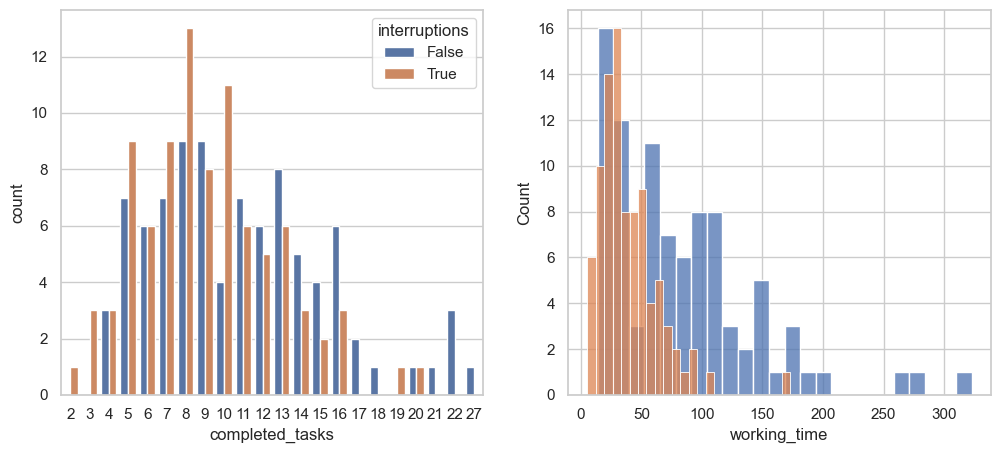

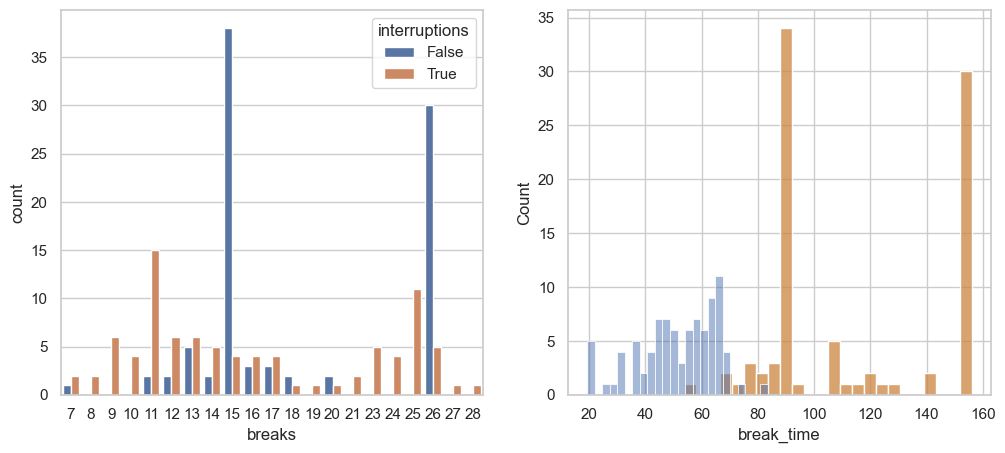

Exception ignored in: <generator object Person.working at 0x281d79850>
Traceback (most recent call last):
  File "/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/matplotlib/transforms.py", line 177, in _invalidate_internal
    for parent in list(self._parents.values()):
RuntimeError: generator ignored GeneratorExit


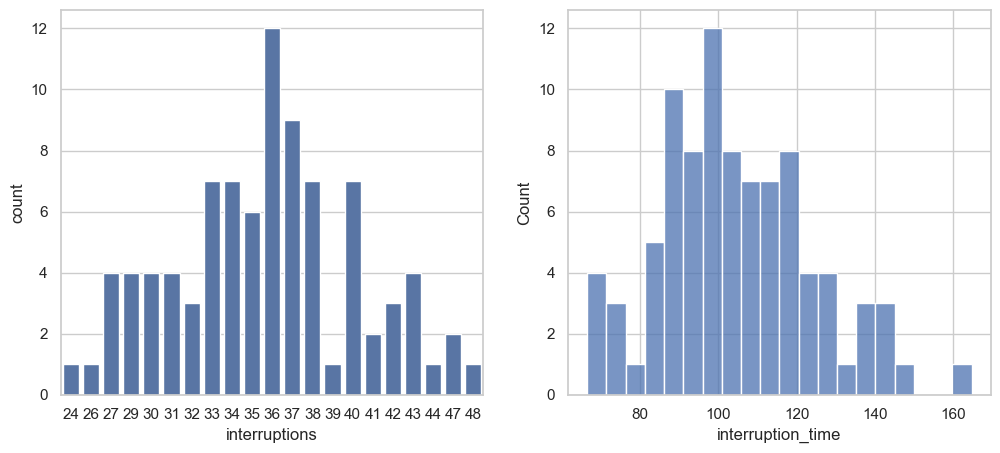

,index,break_duration,break_timestamp,interruptions,completed_tasks,breaks,working_time,break_time,interruption_time,time
0,0,0,0,42,13,7,70.868177,30.889531,97.191641,198.949349
1,0,0,0,29,19,10,172.984777,43.036434,82.810850,298.832061
2,0,0,0,29,12,11,104.085848,53.558284,96.693451,254.337583
3,0,0,0,34,10,17,35.719319,49.264973,105.530643,190.514935
4,0,0,0,42,8,15,36.239384,44.798710,126.646627,207.684722
...,...,...,...,...,...,...,...,...,...,...
175,0,6,12,0,9,26,39.393931,156.000000,0.000000,195.393931
176,0,6,12,0,6,26,20.663704,156.000000,0.000000,176.663704
177,0,6,12,0,8,26,21.779263,156.000000,0.000000,177.779263
178,0,6,12,0,6,26,24.989655,156.000000,0.000000,180.989655


In [26]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme(style="whitegrid")
df['time'] = df['working_time'] + df['break_time'] + df['interruption_time']

fig,ax = plt.subplots(nrows=1, ncols=2, figsize=(12,5))
sns.countplot(x = df['completed_tasks'], ax=ax[0], hue=df['interruptions'] > 0)
sns.histplot(data = df_ni['working_time'], bins=24, ax=ax[1])
sns.histplot(data = df_i['working_time'], bins=24, ax=ax[1])
plt.show()

fig,ax = plt.subplots(nrows=1, ncols=2, figsize=(12,5))
sns.countplot(x = df['breaks'], ax=ax[0], hue=df['interruptions'] > 0)
sns.histplot(data = df_ni['break_time'], bins=24, ax=ax[1], color='peru', )
sns.histplot(data = df_i['break_time'], bins=24, ax=ax[1], alpha=0.5)
plt.show()

fig,ax = plt.subplots(nrows=1, ncols=2, figsize=(12,5))
sns.countplot(x = df_i['interruptions'], ax=ax[0])
sns.histplot(data =df_i['interruption_time'], bins=20, ax=ax[1])
plt.show()

# print(df['break_time'].max())
# print(df['break_time'].min())

# # print(df[df['break_time'] == df['break_time'].max()])
# # df[df['break_time'] == df['break_time'].max()]
df.reset_index()

In [9]:
df_ni.shape

(90, 8)

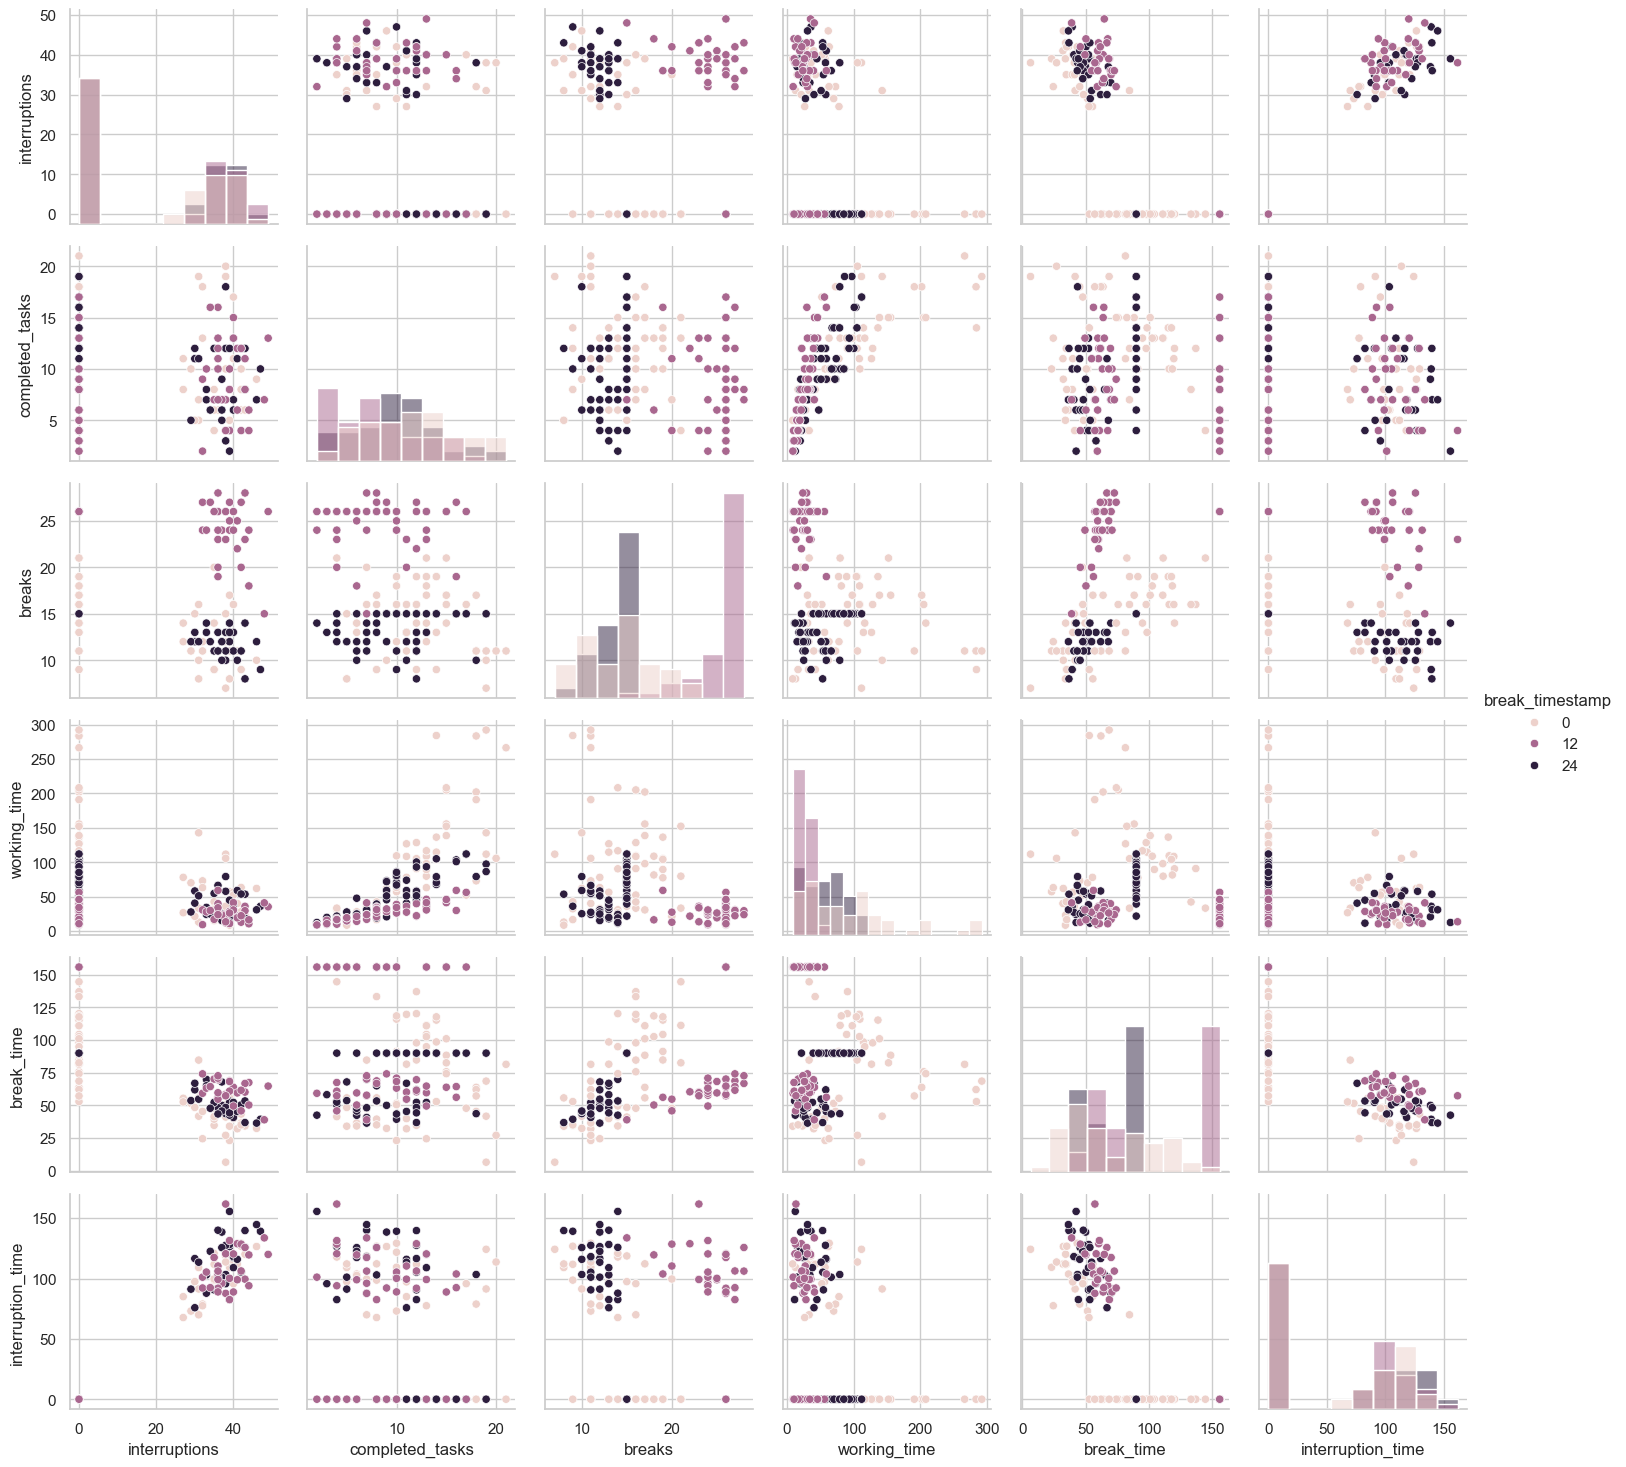

In [10]:

g = sns.PairGrid(df.iloc[:,1:-1], hue='break_timestamp')
g.map_diag(sns.histplot)
g.map_offdiag(sns.scatterplot)
g.add_legend()
plt.show()

# df.iloc[:,1:]

In [11]:
import scipy.stats as st

ks_statistic, p_value = st.ks_2samp(df_i['working_time'], df_ni['working_time'])

print(f"KS statistic: {ks_statistic}")
print(f"P-value: {p_value}")


KS statistic: 0.4888888888888889
P-value: 4.0256597050170936e-10


In [20]:

n = max(df_i['completed_tasks'].max(), df_ni['completed_tasks'].max())

fi  = np.zeros(n+1)
fni = np.zeros(n+1)

for k,v in df_i['completed_tasks'].value_counts().items():
    fi[k] = v

for k,v in df_ni['completed_tasks'].value_counts().items():
    fni[k] = v

print(fi)
print(fni)
chi2_statistic, p_value = st.chisquare(fi+1, f_exp=fni+1)

print(f"Chi-square statistic: {chi2_statistic}")
print(f"P-value: {p_value}")



[ 0.  0.  2.  1.  9.  5.  9. 12.  8.  3.  9.  8. 10.  5.  0.  1.  2.  1.
  2.  2.  1.  0.]
[ 0.  0.  1.  3.  7.  3.  4.  0.  8.  7. 11.  3.  7.  8.  9.  7.  2.  3.
  3.  3.  0.  1.]
Chi-square statistic: 178.30833333333334
P-value: 6.326262909395429e-27


In [21]:
# Realiza la prueba de Mann-Whitney U
u_statistic, p_value = st.mannwhitneyu(df_i['completed_tasks'], df_ni['completed_tasks'], alternative='less')

print(f"U statistic: {u_statistic}")
print(f"P-value: {p_value}")

U statistic: 3010.5
P-value: 0.001438402973428855


Se puede afirmar que es significativamente mayor la cantidad de tareas completadas si no te interrumpen a si te interrumpen